In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = r'C:\Windows\Fonts\gulim.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

In [6]:
with open('result_pickle/ELITISM-0.085MUTATION-0.191_len(500).pkl', 'rb') as f:
    result = pickle.load(f)
with open('result_pickle/results2(len100).pkl', 'rb') as f:
    result2 = pickle.load(f)
with open('result_pickle/result.pkl', 'rb') as f:
    result3 = pickle.load(f)
with open('result_pickle/ELITISM-0.092MUTATION-0.05len(300).pkl', 'rb') as f:
    result4 = pickle.load(f)
with open('../transporter/multi_start/multi_start(len300).pkl', 'rb') as f:
    result5 = pickle.load(f)


In [34]:
with open('GA_cluster4_500_len30.pkl', 'rb') as f:
    ga_cluster = pickle.load(f)
with open('../transporter/multi_start/cluster/cluster4_multi_start(len1000).pkl', 'rb') as f:
    ms_cluster = pickle.load(f)

In [10]:
ms_cluster

,fitness,distance
253,55485.808427,333.6
963,55309.125280,351.3
740,55253.112739,349.9
24,55238.057439,328.1
711,54747.558937,334.3
...,...,...
751,39516.067874,358.3
996,39348.433406,362.8
738,39005.680886,355.1
717,38184.056282,352.9


In [11]:
def get_mutate_elite(result):
    result['ELITISM_RATE'] = result['params'].apply(lambda x: x['ELITISM_RATE'])
    result['MUTATION_RATE'] = result['params'].apply(lambda x:x['MUTATION_RATE'])
    result['POPULATION_SIZE'] = result['params'].apply(lambda x:x['POPULATION_SIZE'])
    result['GENERATION_SIZE'] = result['params'].apply(lambda x:x['GENERATION_SIZE'])
    result['rank'] = range(1, len(result)+1)
    # result = result.drop('params', axis=1)
    result = result.drop('fitness', axis=1)
    return result

def show_df(df, param1, param2):
    # ELITISM_RATE, MUTATION_RATE, Fitness에 대한 산점도 그래프 출력
    # fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=200)
    fig = plt.figure(figsize=(10, 5), dpi=100)
    plt.scatter(df[param1], df[param2])
    plt.title(f'{param1} vs {param2}')
    plt.xlabel(f'{param1}')
    plt.ylabel(f'{param2}')
    # axs[0].scatter(df[param1], range(0,len(df)))
    # axs[0].set_xlabel(f'{param1}')
    # axs[0].set_ylabel(f'{param2}')
    # axs[0].set_title(f'{param1} vs {param2}')
    # axs[1].scatter(df['MUTATION_RATE'], range(0,len(df)))
    # axs[1].set_xlabel('피트니스 내림차순')
    # axs[1].set_ylabel('MUTATION_RATE')
    # axs[1].set_title('Mutation Rate')
    plt.show()

def show_elite(df):
    # 그래프 출력 설정
    fig = plt.figure(figsize=(10, 5), dpi=100)
    plt.scatter(range(0,len(df)), df['ELITISM_RATE'])
    plt.title('Scatter Plot')
    plt.xlabel('피트니스 내림차순')
    plt.ylabel('ELITISM_RATE')
    plt.show()


In [ ]:
df1 = get_mutate_elite(ga_cluster2)
df2 = get_mutate_elite(ms_cluster2)


In [ ]:
fig = plt.figure(figsize=(30, 30), dpi=300)
pd.plotting.scatter_matrix(df1, figsize=(10, 10))
plt.show()


In [36]:
ga_t_test = ga_cluster['distance']
ga_t_test = pd.concat([ga_t_test, pd.Series(['ga'] * len(ga_t_test))], axis=1)
ga_t_test.columns = ['distance', 'group']

multi_start_t_test = ms_cluster['distance']
multi_start_t_test = pd.concat([multi_start_t_test, pd.Series(['multistart'] * len(multi_start_t_test))], axis=1)
multi_start_t_test.columns = ['distance', 'group']

In [37]:
concatenated_df = pd.concat([ga_t_test, multi_start_t_test], axis=0)

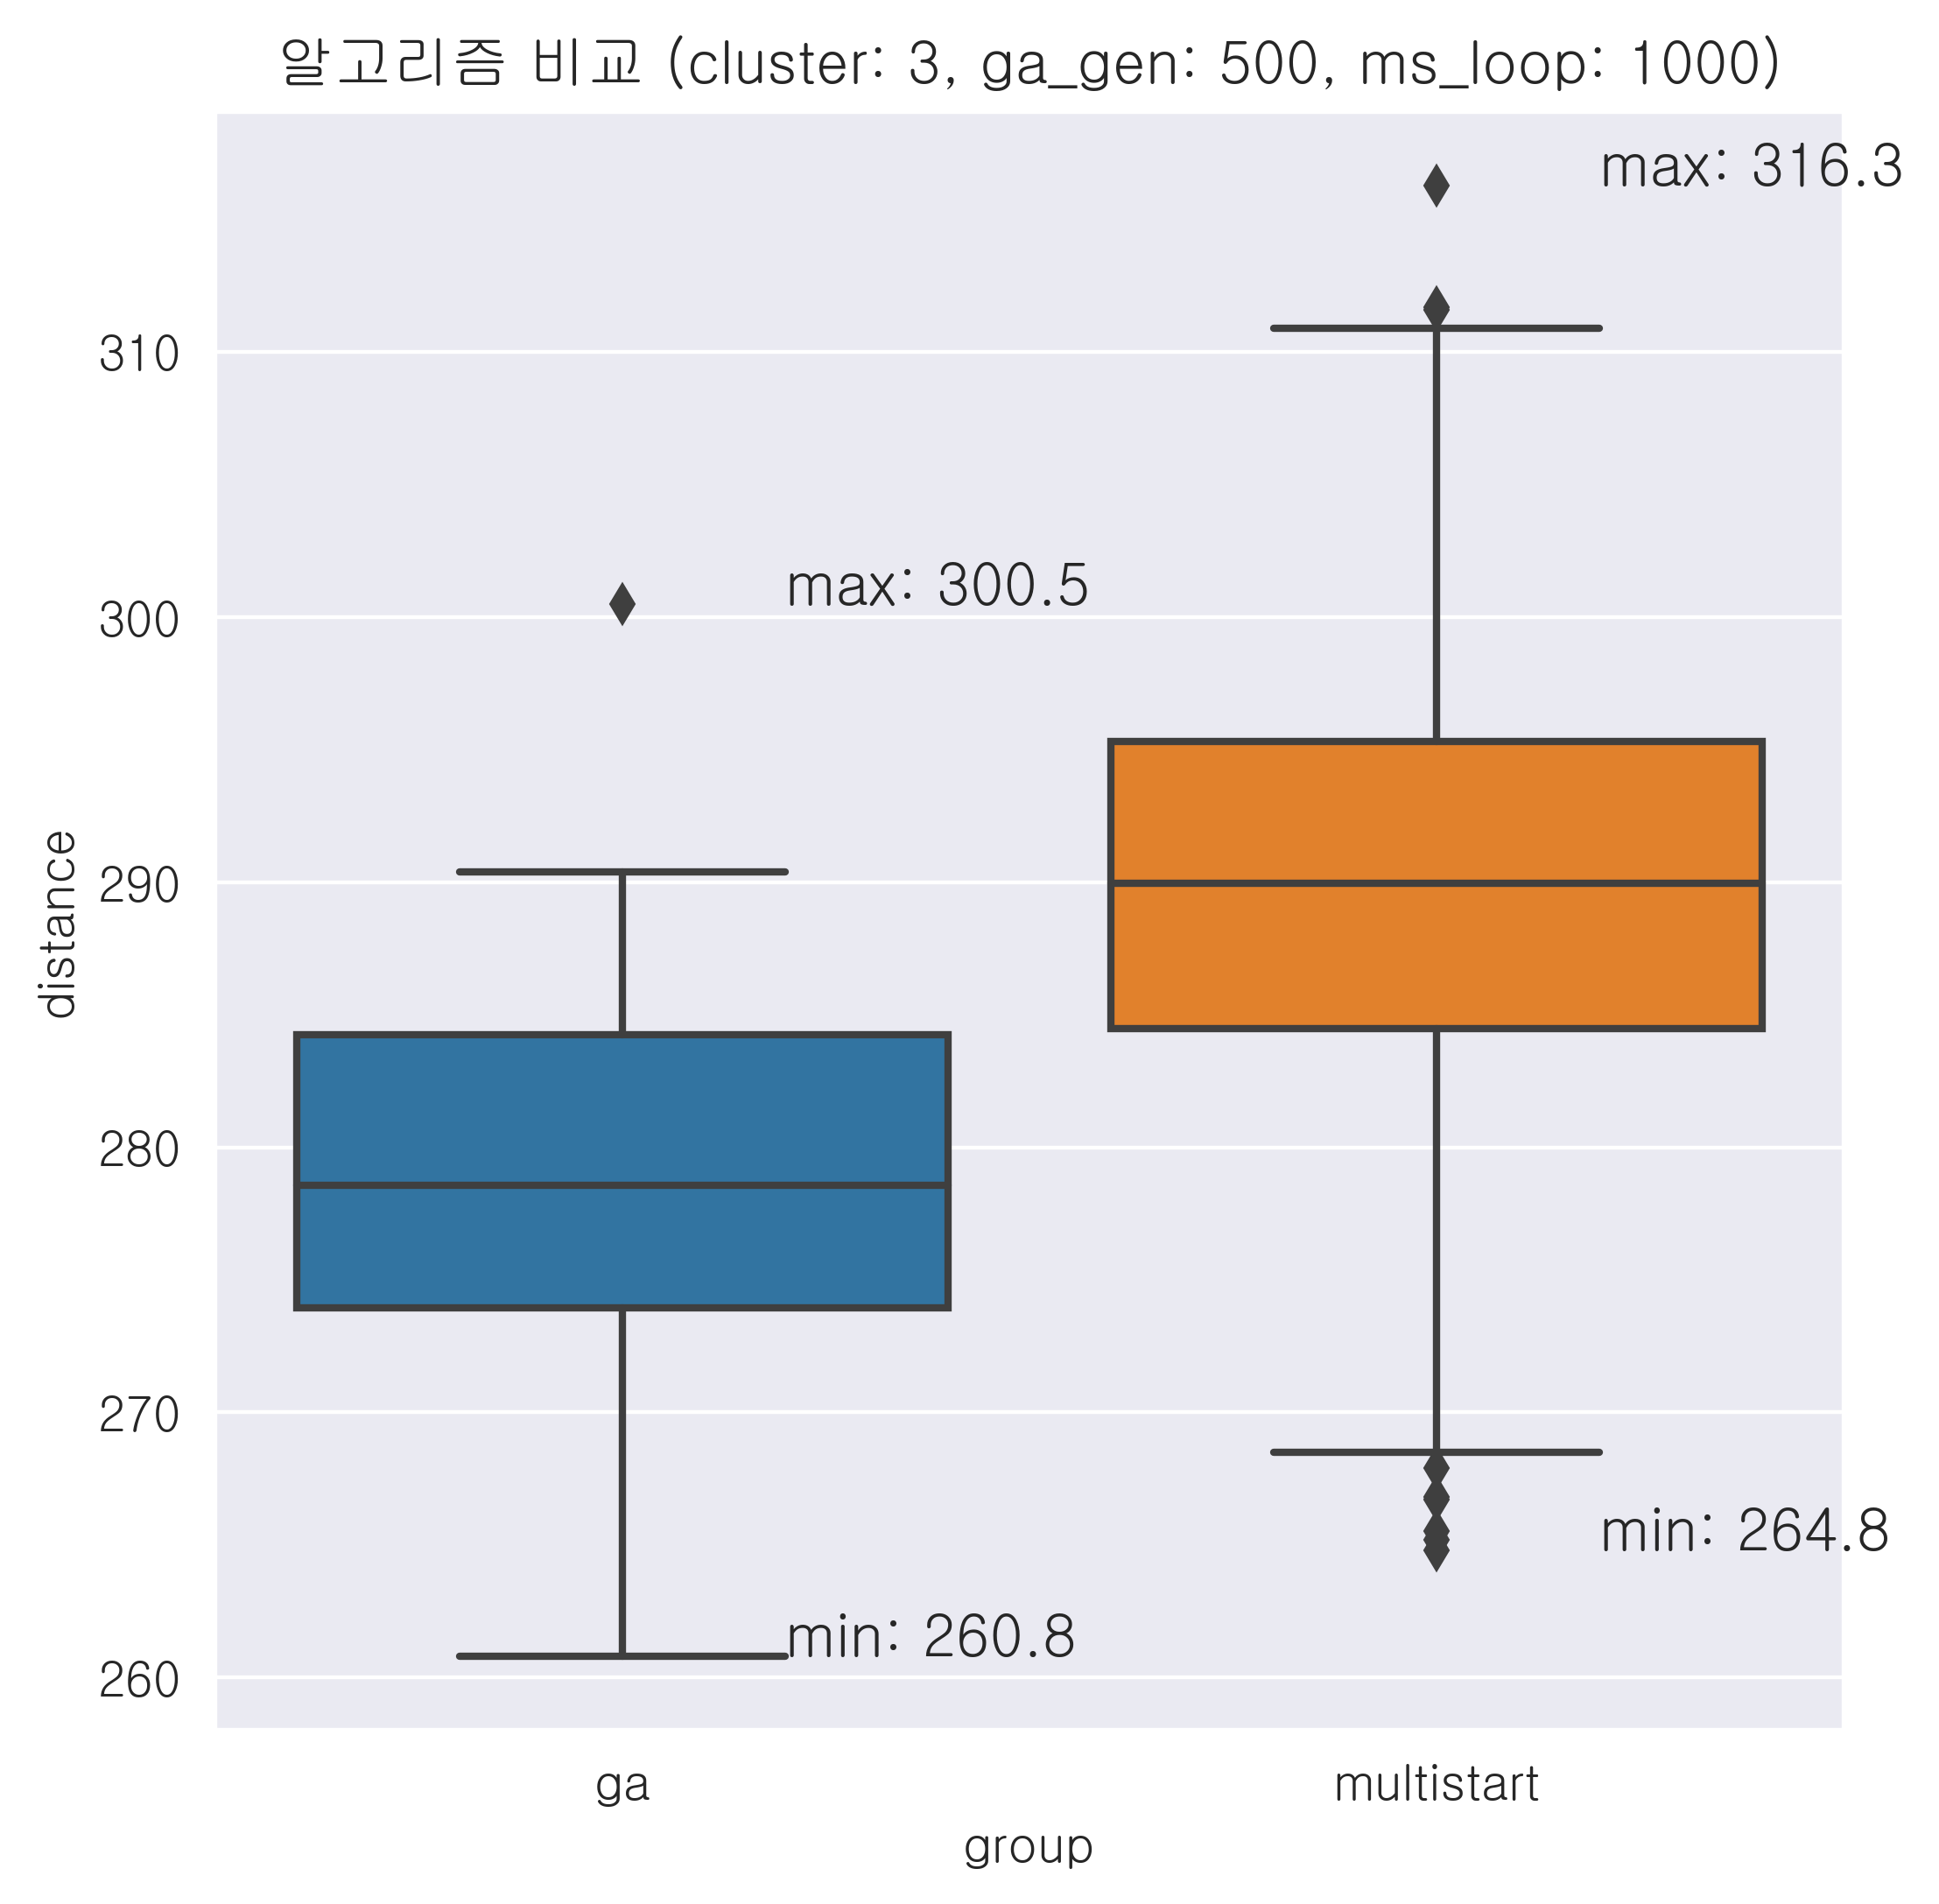

In [38]:
# result4(ga), result5(multistart)
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=400)
sns.boxplot(x='group', y='distance', data=concatenated_df)
plt.title('알고리즘 비교 (cluster: 4, ga_gen: 300, ms_loop: 1000)')

# 각 그룹의 최고점과 최저점을 계산합니다.
groups = concatenated_df.groupby('group')['distance']
min_points = round(groups.min(),3)
max_points = round(groups.max(), 3)

# 최고점과 최저점을 표시합니다.
for i, (group_name, min_point, max_point) in enumerate(zip(min_points.index, min_points, max_points)):
    plt.text(i + 0.2, min_point, f'min: {min_point}', fontsize=12)
    plt.text(i + 0.2, max_point, f'max: {max_point}', fontsize=12)

plt.show()


In [33]:
from scipy import stats
import numpy as np

#샘플 데이터 생성
ga_test = ga_cluster['fitness']
ms_test = ms_cluster['fitness']
#등분산 t-검정
t, p = stats.ttest_ind(ga_test, ms_test, equal_var=True)

print("t-statistic:", t)
print("p-value:", p)


t-statistic: 72.96475580436001
p-value: 0.0
